In [1]:
# Write a program to do following:  
# a) Apply Data pre-processing  
# b) Perform data-preparation (Train-Test Split) 
# c) Apply Machine Learning Algorithm
# d) Evaluate Model. 
# e) Apply Cross-Validation and Evaluate Mode

In [3]:
# Downloading the necessary library

%pip install scipy plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import plotly.express as px


In [11]:
# Loading the Data and getting Insights

df = pd.read_csv('Mall_Customers.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [19]:
# Printing first 5 rows

print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [21]:
# Describing more about data

print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [23]:
# checking if there is a null value or not

print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


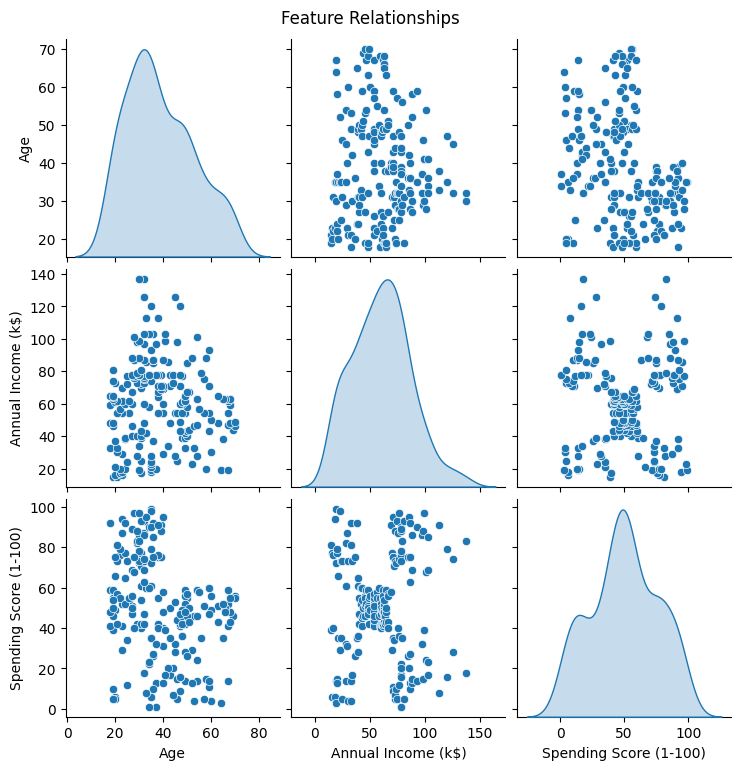

In [31]:
# Performing EDA

# Plotting: Pairplot
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

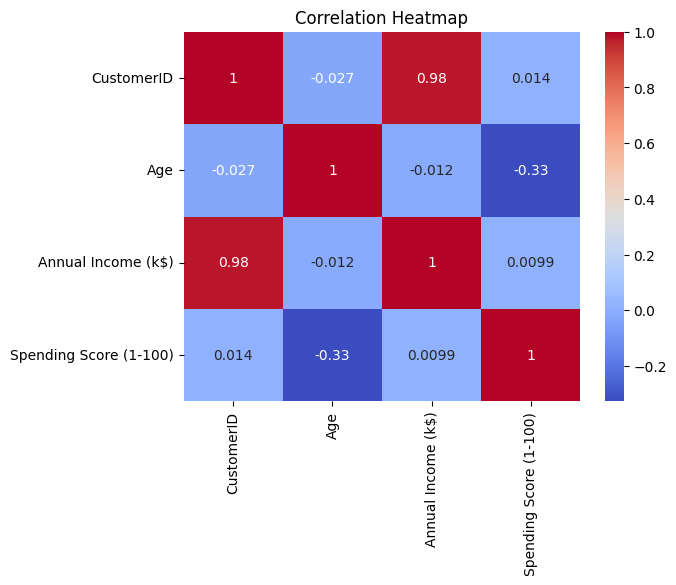

In [33]:
# Plotting: Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

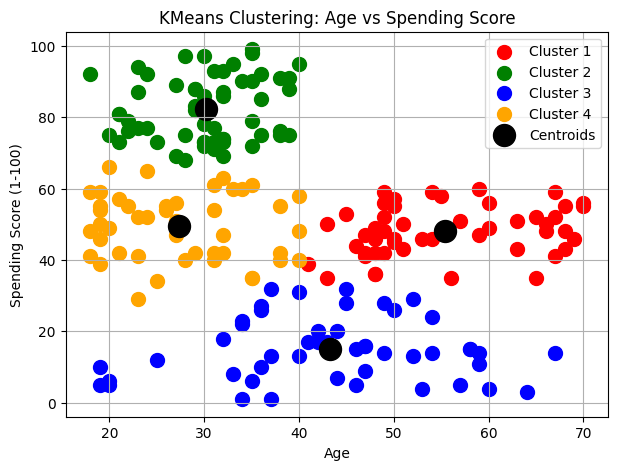

In [39]:
# Applying K-Means Clustering on Age and Speding Score

X = df.iloc[:, [2, 4]].values  # Age and Spending Score

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1)
y_kmeans = kmeans.fit_predict(X)

# Plotting: Scatter Plot
plt.figure(figsize=(7, 5))
colors = ['red', 'green', 'blue', 'orange']
for i in range(4):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, c='black', label='Centroids')
plt.title('KMeans Clustering: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()



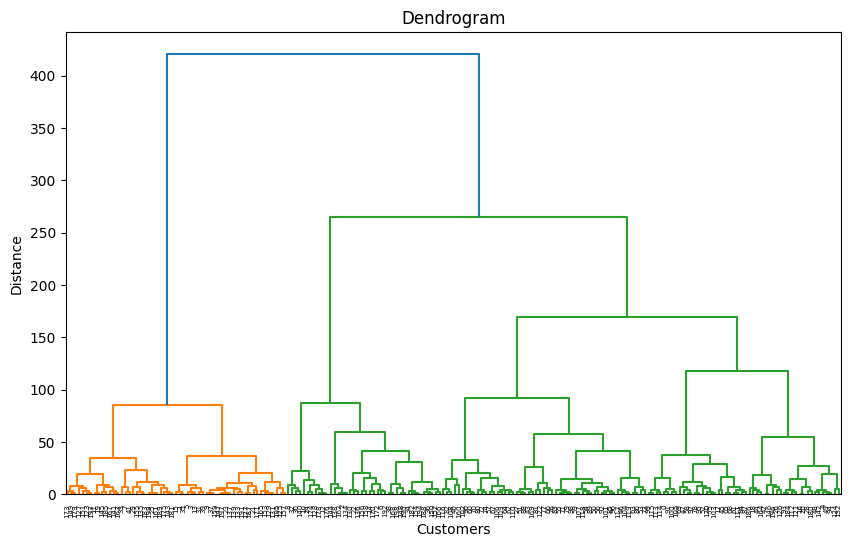

In [43]:
# Plotting: Dendrogram for Hierarchical Clustering

plt.figure(figsize=(10, 6))
shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()


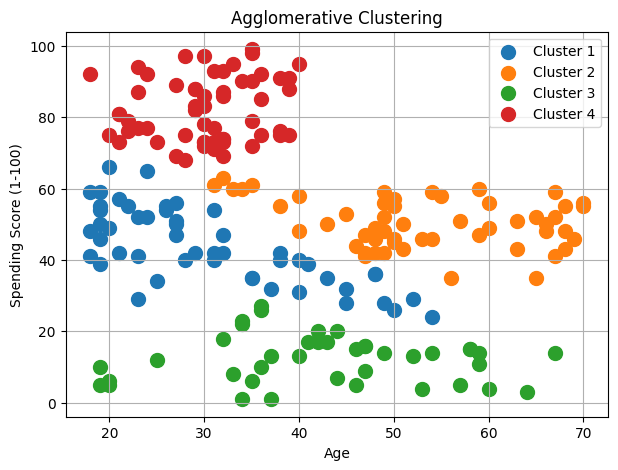

In [47]:
# Applying the Agglomerative Clustering and Visualizing 

agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_agglo = agglo.fit_predict(X)

# Plotting : Scatter Plot
plt.figure(figsize=(7, 5))
for i in range(4):
    plt.scatter(X[y_agglo == i, 0], X[y_agglo == i, 1], 
                s=100, label=f'Cluster {i+1}')
plt.title('Agglomerative Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


Silhouette Score (KMeans): 0.4995
Silhouette Score (Agglomerative): 0.4602


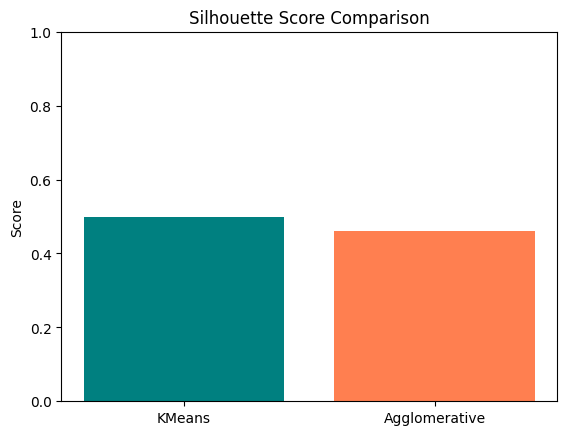

In [49]:
# Silhouette Score Comparison (with Bar Plot)

k_score = silhouette_score(X, y_kmeans)
a_score = silhouette_score(X, y_agglo)

print(f"Silhouette Score (KMeans): {k_score:.4f}")
print(f"Silhouette Score (Agglomerative): {a_score:.4f}")

plt.bar(['KMeans', 'Agglomerative'], [k_score, a_score], color=['teal', 'coral'])
plt.title('Silhouette Score Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()
